In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data

city_df= pd.read_csv(city_data_to_load)
ride_df= pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
combine_df= pd.merge(city_df,ride_df, how="left", on=["city"])

In [5]:
# Display the data table for preview
combine_df.head(15)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [6]:
# We need to gather the data like the City Type, fare from the Data Frame, then we'll plot

grouped_ride_data = combine_df.groupby('city')

fareavg = grouped_ride_data['fare'].mean()

total_rides = grouped_ride_data['ride_id'].count()

total_drivers = grouped_ride_data['driver_count'].max()

city_type = grouped_ride_data['type'].max()


bubble_df = pd.DataFrame ({'Average Fare ($)': fareavg,
                           'Total Rides': total_rides,
                           'Total Drivers': total_drivers,
                           'City Type': city_type})

bubble_df.head()

,Average Fare ($),Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

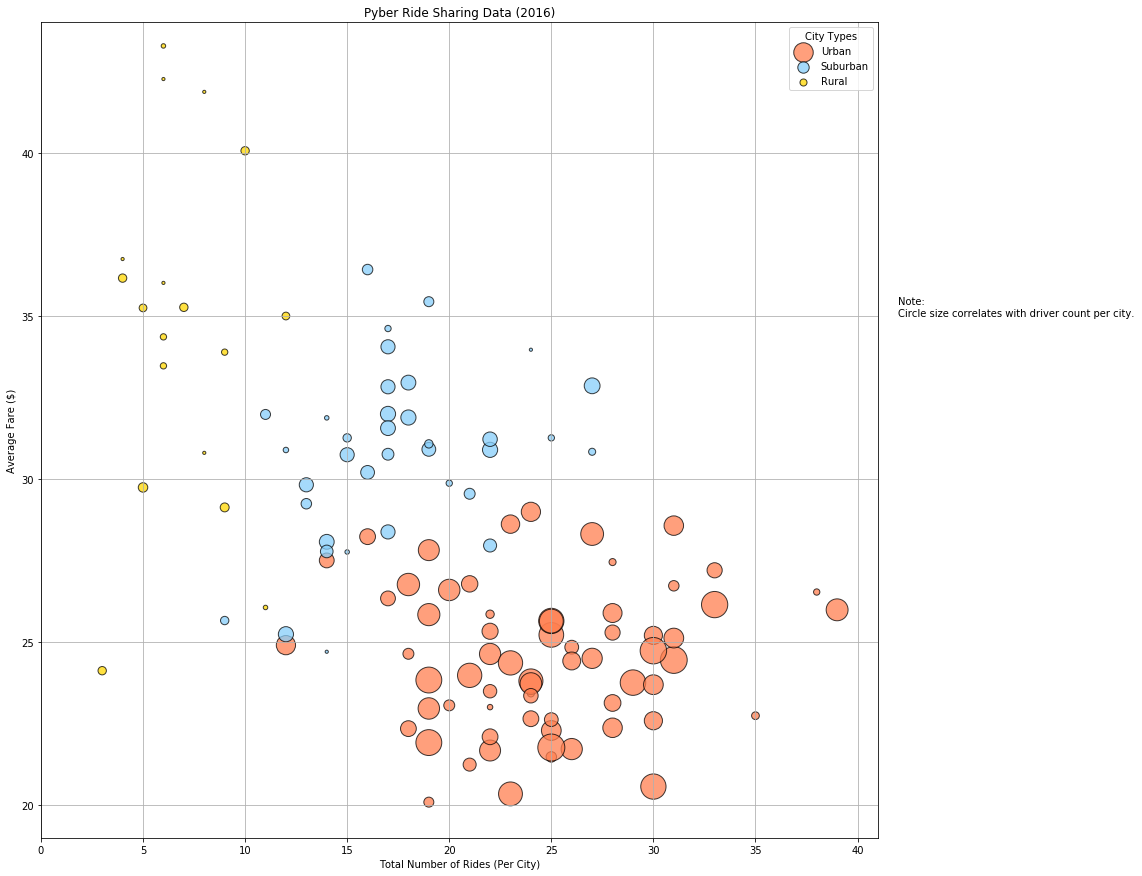

In [13]:
# Obtain the x and y coordinates for each of the three city types


Urban = bubble_df.loc[bubble_df['City Type'] == 'Urban']
Suburban = bubble_df.loc[bubble_df['City Type'] == 'Suburban']
Rural = bubble_df.loc[bubble_df['City Type'] == 'Rural']

x_urban = Urban['Total Rides']
y_urban = Urban['Average Fare ($)']
                
x_suburban = Suburban['Total Rides']
y_suburban = Suburban['Average Fare ($)']
                
x_rural = Rural['Total Rides']
y_rural = Rural['Average Fare ($)']                

# Build the scatter plots f'or each city types

bubble_sizes = [Urban['Total Drivers'] * 10, Suburban['Total Drivers'] * 10, Rural['Total Drivers'] * 10]
colors = ['coral', 'lightskyblue', 'gold']

plt.figure(figsize=(15, 15))

plt.scatter(x_urban, y_urban, s=bubble_sizes[0], linewidths=1, c=colors[0], edgecolor='black', alpha=0.75, label='Urban')
plt.scatter(x_suburban, y_suburban, s=bubble_sizes[1], linewidths=1, c=colors[1], edgecolor='black', alpha=0.75, label='Suburban')
plt.scatter(x_rural, y_rural, s=bubble_sizes[2], linewidths=1, c=colors[2], edgecolor='black', alpha=0.75, label='Rural')

# Incorporate the other graph properties


plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.xlim(0, 41)
plt.ylim(19, 44)
plt.grid(True)

# Create a legend

for handler in legend.legendHandles:
    handler._sizes = [30]
    
legend = plt.legend(title='City Types', loc='best')

# Incorporate a text label regarding circle size

plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

plt.show()


## Total Fares by City Type

In [15]:
ride_urban = combine_df.loc[combine_df['type'] == 'Urban']
ride_suburban = combine_df.loc[combine_df['type'] == 'Suburban']
ride_rural = combine_df.loc[combine_df['type'] == 'Rural']

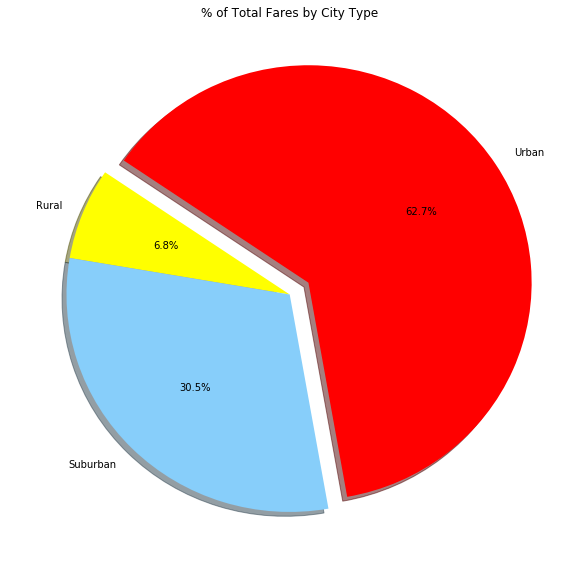

In [32]:
# Calculate Type Percents

urban_percent = ride_urban['fare'].sum() / combine_df['fare'].sum() * 100
suburban_percent = ride_suburban['fare'].sum() / combine_df['fare'].sum() * 100
rural_percent = ride_rural['fare'].sum() / combine_df['fare'].sum() * 100

# Build Pie Chart

labels = ['Urban', 'Rural', 'Suburban']

colors = ['Red', 'Yellow', 'Lightskyblue']

explode = (0.1, 0, 0)

total_fare_percent = [urban_percent, rural_percent, suburban_percent]

# Save Figure

plt.figure(figsize=(10, 10))

plt.pie(total_fare_percent, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)

plt.title('% of Total Fares by City Type')

plt.show()

## Total Rides by City Type

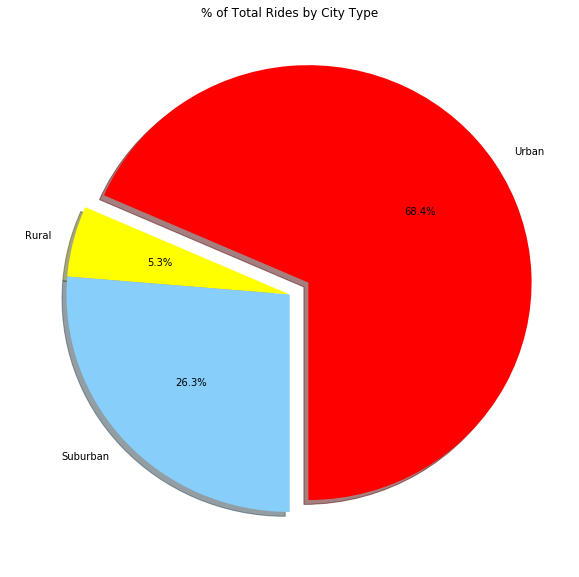

In [33]:
# Calculate Ride Percents

urban_ride_percent = ride_urban['ride_id'].count() / combine_df['ride_id'].count() * 100
suburban_ride_percent = ride_suburban['ride_id'].count() / combine_df['ride_id'].count() * 100
rural_ride_percent = ride_rural['ride_id'].count() / combine_df['ride_id'].count() * 100

# Build Pie Chart

labels = ['Urban', 'Rural', 'Suburban']

colors = ['Red', 'Yellow', 'Lightskyblue']

explode = (0.1, 0, 0)

total_ride_percent = [urban_ride_percent, rural_ride_percent, suburban_ride_percent]

# Save Figure

plt.figure(figsize=(10, 10))

plt.pie(total_ride_percent, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)

plt.title('% of Total Rides by City Type')

plt.show()

## Total Drivers by City Type

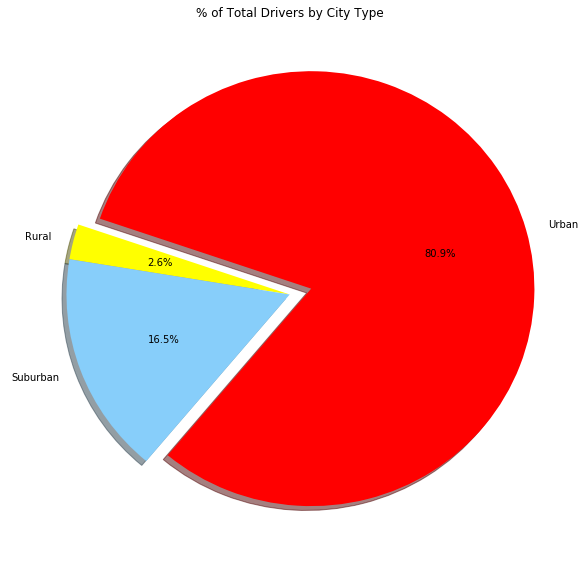

In [31]:
# Calculate Driver Percents

ride_type_urban_grouped = ride_urban.groupby('city')
ride_type_suburban_grouped = ride_suburban.groupby('city')
ride_type_rural_grouped = ride_rural.groupby('city')

urban_driver_percent = ride_type_urban_grouped['driver_count'].max().sum() / grouped_ride_data['driver_count'].max().sum() * 100
suburban_driver_percent = ride_type_suburban_grouped['driver_count'].max().sum() / grouped_ride_data['driver_count'].max().sum() * 100
rural_driver_percent = ride_type_rural_grouped['driver_count'].max().sum() / grouped_ride_data['driver_count'].max().sum() * 100

# Build Pie Chart

labels = ['Urban', 'Rural', 'Suburban']

colors = ['Red', 'Yellow', 'Lightskyblue']

explode = (0.1, 0, 0)

total_driver_percent = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]

# Save Figure

plt.figure(figsize=(10, 10))

plt.pie(total_driver_percent, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)

plt.title('% of Total Drivers by City Type')

plt.show()
